<div style="text-align: right"> <font color='Gray'> Sociofísica - 2023 </div>
<div style="text-align: right"> <font color='Gray'> Tarea N° 4 </div>
<div style="text-align: right"> <font color='Gray'> Constanza Rivas Ortega </div>

    
***

## Modelo de Umbral

El modelo del umbral es un modelo simple de dinámica de multitudes. Consiste en un individuo que debe tomar una decisión binaria, que para este caso típicamente se interpreta como unirse o no unirse a una protesta. El individuo tiene la característica de que evalúa su decisión en base a cuántas personas de la multitud tomaron la decisión entre las mismas dos opciones. Siguiendo el ejemplo de las protestas, el costo de que un individuo se adhiera a la protesta disminuye a medida que el tamaño de esta aumenta.

Se asume que los individuos son racionales, esto es, toman decisiones en base a sus preferencias para maximizar la utilidad. La utilidad que cada individuo ve a la opción de sumarse a la protesta depende de las apreciación personal que tenga cada uno. Por esto, cada individuo tiene su propio $\textbf{umbral}$, refiriéndose al número mínimo de personas que tienen que ver participando en la protesta para adherirse a ella.

Según el umbral personal de cada individuo se definen distintos perfiles. Los agentes con umbral cero son los $\textit{incitadores}$, los con umbral bajo son los $\textit{radicales}$, y finalmente aquellos con umbral alto son los $\textit{conservadores}$.

## Simulacion

La simulación consiste en una función que entrega la cantidad de personas que se suman a la protesta, cuyo comportamiento cambia dependiendo de si los umbrales de los agentes del sistema están distribuidos de forma normal o uniforme.

Mediante funciones predefinidas de Python, se define la configuración inicial de los agentes dependiendo de cómo se distribuyen sus umbrales. Posteriormente se itera para ver si sumar o no agentes a la protesta.

Finalmente se grafica la cantidad de adhesiones vs los umbrales.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from tqdm.auto import tqdm

def granovetter_model(dist,N,um):
    '''
    INPUT
    dist : tipo de distribución ('normal', 'uniforme')
    N : numero de agentes
    um : umbral
    
    '''
    
    # INICIO CONTADOR TEMPORAL
    tini = datetime.now()
    
    # TIPO DE DISTRIBUCION
    if dist=='normal':
        agentes = list(np.abs(np.random.normal(0.4,0.2,N))*100)
        
    elif dist=='uniforme':
        agentes = list(np.random.uniform(0, 1, size=N)*100)
        
    # CONDICION INICIAL
    adhesiones = [0]*um
    
    # ALGORITMO   
    for i in tqdm(range(um)):
        adhesion = 0
        retraccion = 0
        for j in range(N):
            if agentes[j]>i:
                retraccion+=1
            else:
                adhesion+=1
        adhesiones[i] = adhesion/N
    
    # FIN CONTADOR TEMPORAL
    tfin = datetime.now()
    dtie = tfin - tini
    print('Tiempo ocupado (h:m:s:ns):', dtie)
    
    return adhesiones

Simulación umbrales con distribución normal


  0%|          | 0/100 [00:00<?, ?it/s]

Tiempo ocupado (h:m:s:ns): 0:00:00.072962
------------------------
Simulación umbrales con distribución uniforme


  0%|          | 0/100 [00:00<?, ?it/s]

Tiempo ocupado (h:m:s:ns): 0:00:00.079032


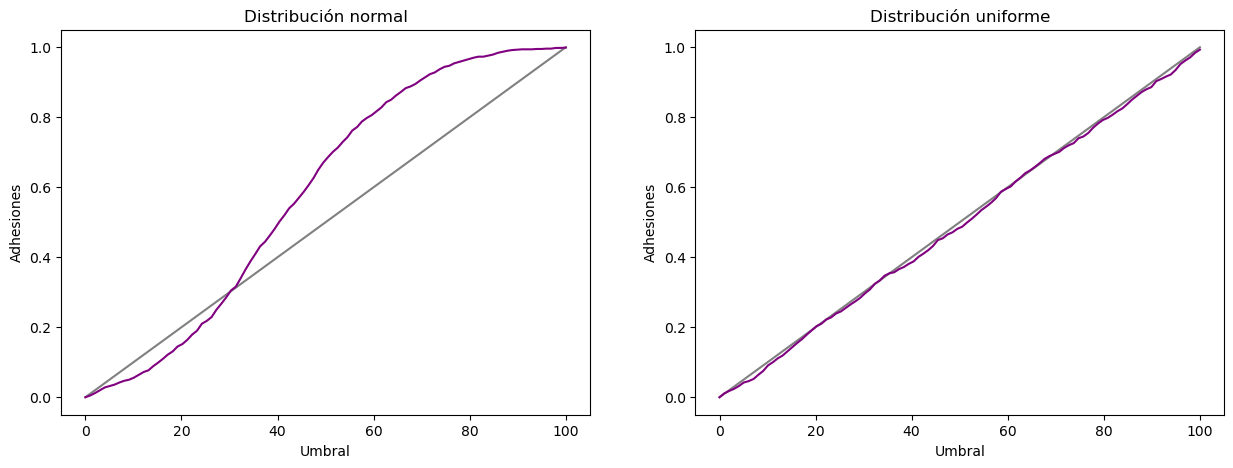

In [2]:
print('Simulación umbrales con distribución normal')
normal = granovetter_model('normal',1000,100)

print('------------------------')

print('Simulación umbrales con distribución uniforme')
uniforme = granovetter_model('uniforme',1000,100)

umbrales = np.linspace(0,100,100)

# CONFIGURACION FIGURA
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

# FIGURA DIST NORMAL
ax1.plot([0,100],[0,1],color='gray')
ax1.set_xlabel("Umbral")
ax1.set_ylabel("Adhesiones")
ax1.set_title("Distribución normal")
    
# FIGURA DIST UNIFORME
ax2.plot([0,100],[0,1],color='gray')
ax2.set_xlabel("Umbral")
ax2.set_ylabel("Adhesiones")
ax2.set_title("Distribución uniforme")
    
ax1.plot(umbrales, normal, color='purple')
ax2.plot(umbrales, uniforme, color='purple')

plt.show()